# In-Class Exercise 04-10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df["cluster"] = clusters

/Users/sergioguerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


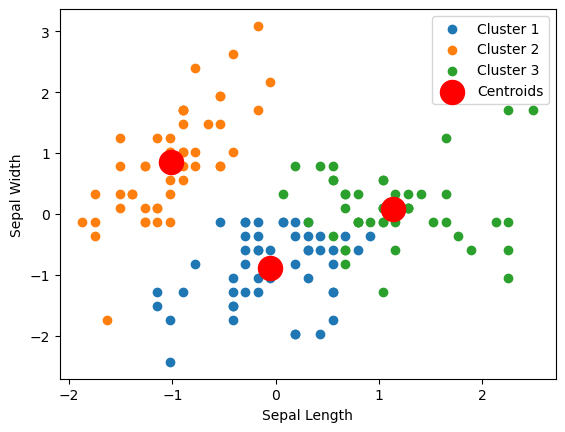

In [6]:
plt.scatter(df_scaled[clusters==0,0], df_scaled[clusters==0,1], label='Cluster 1')
plt.scatter(df_scaled[clusters==1,0], df_scaled[clusters==1,1], label='Cluster 2')
plt.scatter(df_scaled[clusters==2,0], df_scaled[clusters==2,1], label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

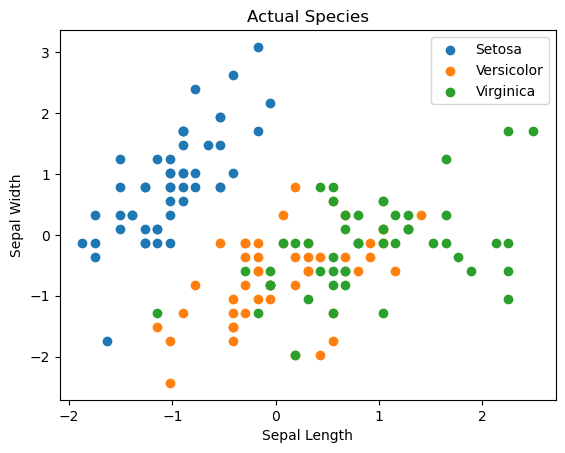

In [7]:
plt.scatter(df_scaled[iris.target==0,0], df_scaled[iris.target==0,1], label='Setosa')
plt.scatter(df_scaled[iris.target==1,0], df_scaled[iris.target==1,1], label='Versicolor')
plt.scatter(df_scaled[iris.target==2,0], df_scaled[iris.target==2,1], label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual Species')
plt.legend()
plt.show()

We can see from the actual species graph that the Setosa species seems to be correctly clustered in Cluster 2.

Unfortunately, it seems that Versicolor and Virginica have a lot of overlap in the actual species graph which is reflected in the clusters which seem to not accurately reflect the two species.

/Users/sergioguerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


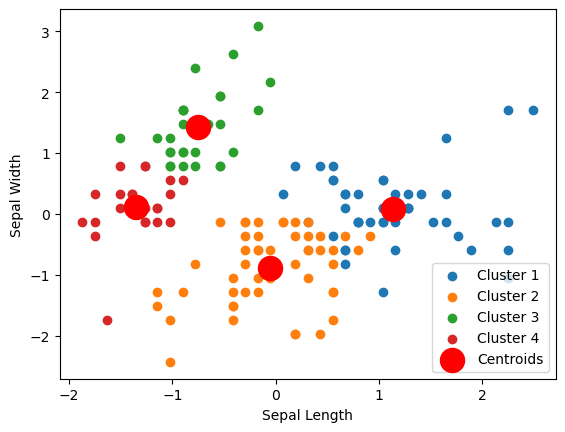

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df["cluster"] = clusters

plt.scatter(df_scaled[clusters==0,0], df_scaled[clusters==0,1], label='Cluster 1')
plt.scatter(df_scaled[clusters==1,0], df_scaled[clusters==1,1], label='Cluster 2')
plt.scatter(df_scaled[clusters==2,0], df_scaled[clusters==2,1], label='Cluster 3')
plt.scatter(df_scaled[clusters==3,0], df_scaled[clusters==3,1], label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Changing the number of clusters `k` causes the amount of groups created to increase. We can see in the graph above that the Setosa species is split into 2 clusters instead of one like in our previous cluster graph with only 3 clusters.